In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 한글폰트 적용을 위해 필요한 library
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc

import warnings
warnings.filterwarnings(action='ignore') # 경고 무시

# 그래프에서 '-' 기호가 문제가 생길 수 있음
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 적용
font_path = 'C:/jupyter_home/font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

## 0. DataLoad

In [2]:
movie = pd.read_csv('C:/jupyter_home/data/movies/movies.csv')
rating = pd.read_csv('C:/jupyter_home/data/movies/ratings.csv')

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


---

## 1. 사용자가 평가한 모든 영화의 전체 평균 평점을 출력하세요

In [5]:
print(rating['rating'].mean())

3.501556983616962


## 2. 각 사용자별 평균 평점을 구하세요

In [6]:
user_rate = rating.groupby('userId')['rating'].mean()

In [7]:
user_rate

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

## 3. 각 영화별 평균 평점을 구하세요.
출력시 정렬은 movieID로 오름차순 정렬


In [8]:
movie_rate = rating.groupby('movieId')['rating'].mean()
movie_rate

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [9]:
movie_rate_with_title = pd.merge(movie, movie_rate,
                                 left_on='movieId',
                                 right_index=True,
                                 how='inner')
movie_rate_with_title = movie_rate_with_title.drop('genres', axis=1)
movie_rate_with_title

,movieId,title,rating
0,1,Toy Story (1995),3.920930
1,2,Jumanji (1995),3.431818
2,3,Grumpier Old Men (1995),3.259615
3,4,Waiting to Exhale (1995),2.357143
4,5,Father of the Bride Part II (1995),3.071429
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),4.000000
9738,193583,No Game No Life: Zero (2017),3.500000
9739,193585,Flint (2017),3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),3.500000


## 4. 평균 평점이 가장 높은 영화의 제목을 출력하세요
단, 동률이 있을 경우 모두 출력하고 title을 기준으로 오름차순 정렬하세요

In [10]:
top_rating = movie_rate.max()  # 3번에서 구한 영화별 평균평점에서 최대값 : 5
top_movie_lst = movie_rate[movie_rate==top_rating] # 평균평점이 5인 영화의 리스트

In [11]:
top_movie = pd.merge(movie, top_movie_lst,
                     left_on='movieId',
                     right_index=True,
                     how='inner')
top_movie = top_movie.sort_values(by='title', ascending=True)
top_movie = top_movie.drop('genres', axis=1)
top_movie

,movieId,title,rating
5690,27751,'Salem's Lot (2004),5.0
7332,77846,12 Angry Men (1997),5.0
9046,141816,12 Chairs (1976),5.0
3893,5468,20 Million Miles to Earth (1957),5.0
5639,27373,61* (2001),5.0
...,...,...,...
9711,187717,Won't You Be My Neighbor? (2018),5.0
8355,108795,Wonder Woman (2009),5.0
9289,158398,World of Glory (1991),5.0
9560,173351,Wow! A Talking Fish! (1983),5.0


## 5. Comedy 영화 중 가장 평점이 낮은 영화의 제목을 출력하세요
단, 동률이 있을 경우 모두 출력하고 title을 기준으로 오름차순 정렬하세요

In [12]:
movie_info = pd.merge(movie, movie_rate,
                      left_on='movieId',
                      right_index=True,
                      how='inner')
movie_info # 영화 테이블에 3번에서 구한 영화별 평균평점을 조인시켜 영화 정보 데이터 프레임을 만듦

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [13]:
comedy = movie_info[movie_info['genres'].str.contains('Comedy')] # genres 컬럼에서 comedy를 포함하는 영화를 추출.
nojam_comedy = comedy[comedy['rating']==comedy['rating'].min()] # comedy영화의 DataFrame에서 평점평균이 가장 낮는 영화를 boolean index.
nojam_comedy = nojam_comedy.sort_values(by='title', ascending=True) # 제목 기준 오름차순 정렬
nojam_comedy = nojam_comedy.drop('rating', axis=1)

In [14]:
nojam_comedy

,movieId,title,genres
8893,134528,Aloha (2015),Comedy|Drama|Romance
5777,31422,Are We There Yet? (2005),Children|Comedy
7762,91414,Arthur Christmas (2011),Animation|Children|Comedy|Drama
9419,165645,Bad Santa 2 (2016),Comedy
4439,6557,Born to Be Wild (1995),Adventure|Children|Comedy|Drama
5409,25782,Boudu Saved From Drowning (Boudu sauvé des eau...,Comedy
6554,54934,"Brothers Solomon, The (2007)",Comedy
5453,26095,"Carabineers, The (Carabiniers, Les) (1963)",Comedy|Drama|War
6545,54768,Daddy Day Camp (2007),Children|Comedy
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama


## 6. 2015년에 평가된 모든 Romance 영화의 평균 평점은?

In [15]:
import datetime as dt
import time
start = dt.datetime(2015,1,1,0,0,0) # 2015년 1월 1일 0시 0분 0초
end = dt.datetime(2016,1,1,0,0,0) # 2016년 1월 1일 0시 0분 0초
start_timestamp = time.mktime(start.timetuple()) # 1420038000.0
end_timestamp = time.mktime(end.timetuple())  # 1451574000.0

# timestamp가 start 이상, end 미만인 행을 boolean indexing
# rate_2015 = rating[rating['timestamp'] >= start_timestamp] # 2015년 이상
# rate_2015 = rate_2015[rate_2015['timestamp'] < end_timestamp] # 2016년 미만
rate_2015 = rating[(rating['timestamp'] >= start_timestamp) & (rating['timestamp'] < end_timestamp)]
rate_2015 # 2015년에 평가된 모든 정보

,userId,movieId,rating,timestamp
232,2,318,3.0,1445714835
233,2,333,4.0,1445715029
234,2,1704,4.5,1445715228
235,2,3578,4.0,1445714885
236,2,6874,4.0,1445714952
...,...,...,...,...
95936,601,79132,5.0,1441639524
95947,601,109487,5.0,1441639184
95948,601,112556,4.0,1441639189
95951,601,116797,4.0,1441639186


In [16]:
romance = movie[movie['genres'].str.contains('Romance')] # 장르가 Romance인 모든 영화
romance

,movieId,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
14,15,Cutthroat Island (1995),Action|Adventure|Romance
...,...,...,...
9639,179511,Emerald Green (2016),Adventure|Drama|Fantasy|Romance
9660,181315,Phantom Thread (2017),Drama|Romance
9691,184349,Elsa & Fred (2005),Comedy|Drama|Romance
9715,188751,Mamma Mia: Here We Go Again! (2018),Comedy|Romance


In [17]:
romance_2015 = pd.merge(romance, rate_2015,
                        on='movieId',
                        how='inner')  # 2015년에 평가된 정보와 Romance 장르의 영화를 movieId로 inner join함.
# 2015년에 평가되었지만 로맨스 장르가 아닌 영화와 로맨스 장르이지만 2015년에 평가되지 않은 영화를 제외.
romance_2015 # 2015년에 평가된 모든 Romance 장르 영화의 DataFrame

,movieId,title,genres,userId,rating,timestamp
0,3,Grumpier Old Men (1995),Comedy|Romance,308,0.5,1421374465
1,7,Sabrina (1995),Comedy|Romance,177,1.0,1435534432
2,11,"American President, The (1995)",Comedy|Drama|Romance,177,3.0,1435890660
3,17,Sense and Sensibility (1995),Drama|Romance,227,3.5,1447210004
4,17,Sense and Sensibility (1995),Drama|Romance,323,3.5,1422640288
...,...,...,...,...,...,...
1264,139747,Before We Go (2014),Romance,563,3.5,1448243169
1265,139915,How to Make Love Like an Englishman (2014),Comedy|Romance,21,2.5,1441393919
1266,140162,Love (2015),Drama|Romance,318,4.5,1450717949
1267,140301,The Escort (2015),Comedy|Romance,21,3.0,1441393974


In [18]:
romance_2015['rating'].mean()

3.396375098502758

## 7. 모든 영화장르 중 사용자 평점이 가장 좋은 영화장르는 무엇인가요?
동률이 잇으면 영화장르를 기준으로 오름차순 정렬하세요

In [19]:
genres = movie['genres'].unique()  # 장르 컬럼의 값들이 형태 : 한 영화에 한 장르가 아니라 여러 장르가 |로 구분되어서 표시되고 있음
display(genres)
print(type(genres))

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

<class 'numpy.ndarray'>


In [20]:
genres_list = []
for genre in genres :
    temp = list(genre.split("|"))
    for x in temp :
        if x not in genres_list:
            genres_list.append(x)

print(genres_list) # |로 나누어 영화 장르의 리스트를 만듦.

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']


In [21]:
movie_info # 위에서 만든 영화별 평점평균을 포함한 데이터프레임

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [22]:
genres_rate = []
for genre in genres_list :
    rate = movie_info[movie_info['genres'].str.contains(genre)]['rating'].mean() # genres_list를 이용하여 장르별 평점평균을 구하고
    genres_rate.append(rate) # 구한 평점평균을 새로운 리스트에 저장함.

print(genres_rate)

[3.215229808197848, 3.497119150128774, 3.1076903605293134, 3.181716291867792, 3.218843125330386, 3.3648703259133232, 3.4209053471055375, 3.0944984491955134, 3.301843831031174, 3.1561160994630257, 2.9189646997100778, 3.3303636065388313, 3.1026374537884083, 3.5716549384975464, 3.2963709618468595, 3.7816816901269963, 3.3119963710928855, 3.3833889087601268, 3.6704709375189575, 3.3711484593837535]


In [23]:
genres_rate_ranking = pd.Series(genres_rate,
                                index=genres_list) # genres_rate는 genres_list와 동일한 순서로 생성되었으므로 list를 index로 하는 Series를 만듦.
top_genres = genres_rate_ranking[genres_rate_ranking==genres_rate_ranking.max()] # Series에서 가장 높은 rating에 해당하는 장르를 추출
top_genres = top_genres.sort_index() # 제목 순 정렬
top_genres

Documentary    3.781682
dtype: float64

---
# Self Study

### 장르별 평균평점 시각화
어떤 장르가 가장 인기가 많을지

In [24]:
# 바로 위 7번에서 구한 장르별 평균평점
genres_rate_ranking

Adventure             3.215230
Animation             3.497119
Children              3.107690
Comedy                3.181716
Fantasy               3.218843
Romance               3.364870
Drama                 3.420905
Action                3.094498
Crime                 3.301844
Thriller              3.156116
Horror                2.918965
Mystery               3.330364
Sci-Fi                3.102637
War                   3.571655
Musical               3.296371
Documentary           3.781682
IMAX                  3.311996
Western               3.383389
Film-Noir             3.670471
(no genres listed)    3.371148
dtype: float64

In [25]:
# 오름차순 정렬
genres_rate_ranking.sort_values(ascending=True, inplace=True) # ascending=True 오름차순 default

In [26]:
genres_rate_ranking

Horror                2.918965
Action                3.094498
Sci-Fi                3.102637
Children              3.107690
Thriller              3.156116
Comedy                3.181716
Adventure             3.215230
Fantasy               3.218843
Musical               3.296371
Crime                 3.301844
IMAX                  3.311996
Mystery               3.330364
Romance               3.364870
(no genres listed)    3.371148
Western               3.383389
Drama                 3.420905
Animation             3.497119
War                   3.571655
Film-Noir             3.670471
Documentary           3.781682
dtype: float64

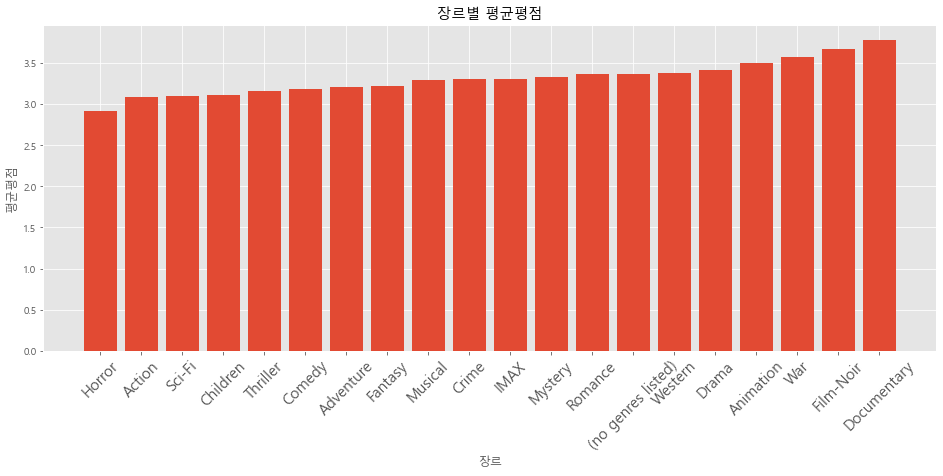

In [27]:
plt.figure(figsize=(16,6))
plt.style.use('ggplot')
plt.bar(genres_rate_ranking.index, genres_rate_ranking.values)
plt.title('장르별 평균평점')
plt.xlabel('장르')
plt.ylabel('평균평점')
plt.xticks(rotation='45', fontsize=15)
plt.show()

### 시간에 따른 리뷰 개수 추이

In [28]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [29]:
datetime_rating = rating.copy()
# # timestamp를 datetime으로 바꾸어 복사한 datetime_rating dataframe에 컬럼을 추가

# 1. list comprehension
# datetime_rating['datetime'] = [ dt.datetime.fromtimestamp(timestamp) for timestamp in datetime_rating['timestamp'] ]

In [30]:
def timestamp_to_datetime(t) :
    return dt.datetime.fromtimestamp(t)
## map 함수 이용
datetime_rating['datetime'] = datetime_rating['timestamp'].map(timestamp_to_datetime)

In [31]:
# timestamp 컬럼은 이제 필요없으니 지워줌
datetime_rating.drop('timestamp', axis=1, inplace=True)
# 결과확인
datetime_rating

,userId,movieId,rating,datetime
0,1,1,4.0,2000-07-31 03:45:03
1,1,3,4.0,2000-07-31 03:20:47
2,1,6,4.0,2000-07-31 03:37:04
3,1,47,5.0,2000-07-31 04:03:35
4,1,50,5.0,2000-07-31 03:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-04 06:53:22
100832,610,168248,5.0,2017-05-04 07:21:31
100833,610,168250,5.0,2017-05-09 04:50:47
100834,610,168252,5.0,2017-05-04 06:19:12


In [32]:
## 연도별 평가의 수를 비교할 것이므로 datetime에서 연도만 빼서 새로운 컬럼으로 만들어 줌
# datetime.year => datetime에서 년도만 리턴함.
# 1. list comprehension
datetime_rating['year'] = [time.year for time in datetime_rating['datetime']]
datetime_rating

# map을 이용해서 다르게 표현할 수 있음
# def extract_year(t) :
#     return t.year
# datetime_rating['year'] = datetime_rating['datetime'].map(extract_year)

,userId,movieId,rating,datetime,year
0,1,1,4.0,2000-07-31 03:45:03,2000
1,1,3,4.0,2000-07-31 03:20:47,2000
2,1,6,4.0,2000-07-31 03:37:04,2000
3,1,47,5.0,2000-07-31 04:03:35,2000
4,1,50,5.0,2000-07-31 03:48:51,2000
...,...,...,...,...,...
100831,610,166534,4.0,2017-05-04 06:53:22,2017
100832,610,168248,5.0,2017-05-04 07:21:31,2017
100833,610,168250,5.0,2017-05-09 04:50:47,2017
100834,610,168252,5.0,2017-05-04 06:19:12,2017


연도별 개수를 세는 과정(아래의 몇 줄) == ... 필요없는 과정
-> groupby로 한줄로 해결가능


```python
year_cnt = datetime_rating.groupby(['year'])['rating'].count()
```

In [72]:
# 연도의 값들을 중복없이 years에 따로 저장. years의 타입은 ndarray
years = datetime_rating['year'].unique()
print(len(years))
type(years)

23


numpy.ndarray

In [34]:
years.sort() # 오름차순 정렬
years

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018], dtype=int64)

In [35]:
sum(datetime_rating['year']==1996)  # 한 해에 존재하는 리뷰의 수를 세는 방법

6031

In [36]:
datetime_rating['year']==1996 # boolean mask

0         False
1         False
2         False
3         False
4         False
          ...  
100831    False
100832    False
100833    False
100834    False
100835    False
Name: year, Length: 100836, dtype: bool

In [37]:
# 모든 해에 대해서 리뷰의 수를 세어 year_cnt로 저장.
year_cnt = [sum(datetime_rating['year']==y) for y in years]
len(year_cnt) # 모두 잘 세어졌는지 확인

23

In [38]:
# year과 year_cnt로 dateframe을 만듦
year_df = pd.DataFrame(year_cnt,
                       index=years,
                       columns=['reviews num'])
year_df

,reviews num
1996,6031
1997,1925
1998,507
1999,2439
2000,10061
2001,3922
2002,3478
2003,4012
2004,3276
2005,5818


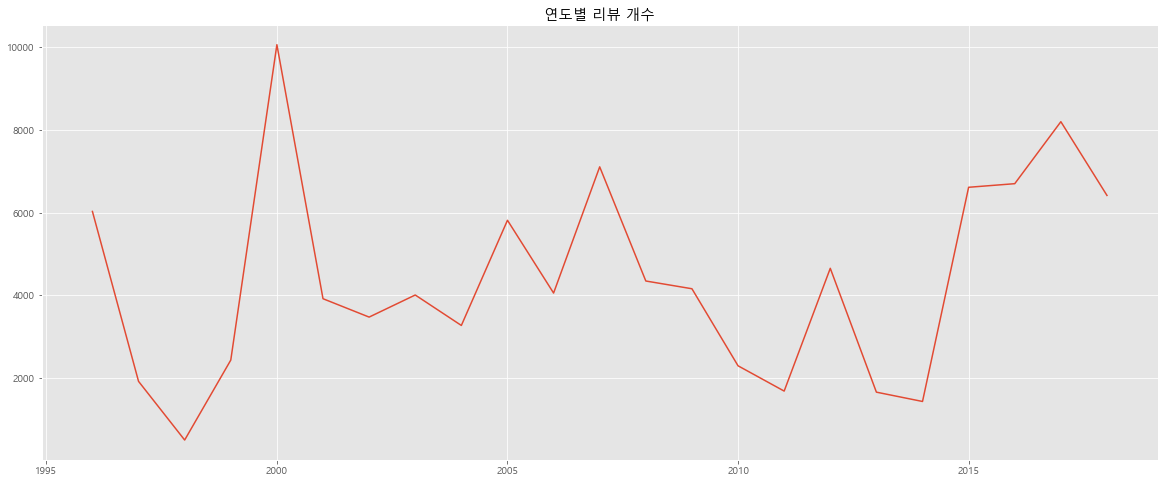

In [39]:
# line chart로 추세 확인

plt.figure(figsize=(20,8))
plt.plot(years ,year_cnt)
plt.title('연도별 리뷰 개수')
plt.show()

### 평점데이터 분석

In [40]:
score = rating['rating']
type(score)

pandas.core.series.Series

In [41]:
# 평균
score.mean()

3.501556983616962

In [42]:
# 중위값
np.median(score)

3.5

In [43]:
# 최빈값
score.mode()

0    4.0
Name: rating, dtype: float64

In [44]:
# 편차
score - score.mean()

0         0.498443
1         0.498443
2         0.498443
3         1.498443
4         1.498443
            ...   
100831    0.498443
100832    1.498443
100833    1.498443
100834    1.498443
100835   -0.501557
Name: rating, Length: 100836, dtype: float64

In [45]:
# 표본분산
score.var(ddof=0)

1.0868564357327866

In [46]:
# 불편분산
score.var()

1.08686721429614

n = 100836이라 표본분산과 불편분산의 값이 크게 차이나지 않음

In [47]:
# 표준편차
score.std()

1.0425292390605359

In [48]:
# 표준편차2
score.var() ** (1/2)

1.0425292390605359

In [49]:
# 사분위값
print('Q1 : ', np.percentile(score, 25))
print('Q2 : ', np.percentile(score, 50))
print('Q3 : ', np.percentile(score, 75))

Q1 :  3.0
Q2 :  3.5
Q3 :  4.0


In [50]:
# 시각화
idx = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
freq = [sum(rating['rating']==s) for s in idx]
print(freq)
print(len(idx))
print(len(freq))

[0, 1370, 2811, 1791, 7551, 5550, 20047, 13136, 26818, 8551, 13211]
11
11


이렇게 셋는데 알고보니 groupby로 하면 되는 거였음

In [51]:
babo = rating.groupby('rating')['userId'].count()
babo

rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: userId, dtype: int64

In [52]:
# 어쨌든 표 만들기
freq_table = pd.DataFrame({'reviews':freq},
                          index=idx)
freq_table

,reviews
0.0,0
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


<BarContainer object of 11 artists>

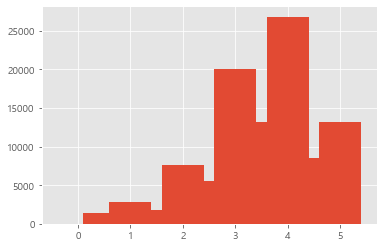

In [53]:
# bar chart
plt.bar(idx, freq)

idx가 숫자로 인식되어 범위로 나타남...

In [54]:
# 문자타입으로 변환
type(idx) # list
idx = np.array(idx)
type(idx) # ndarray

idx=idx.astype(np.str)
type(idx[0])

numpy.str_

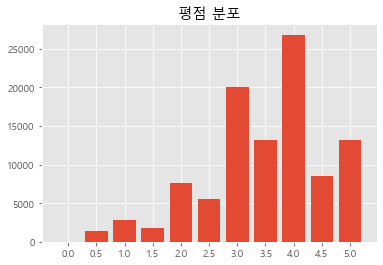

In [55]:
# bar chart 다시 그리기
plt.bar(idx, freq)
plt.title('평점 분포')
plt.show()

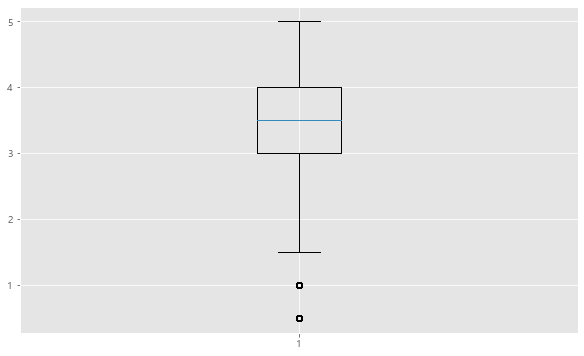

In [56]:
# box plot
plt.figure(figsize=(10,6))
plt.boxplot(x=[rating['rating']])
plt.show()

### 리뷰수가 가장 많은 사용자를 찾고
### 그 사용자의 선호 장르 찾기 (평점을 높게준 5개 장르)

In [57]:
user_review_cnt = rating.groupby('userId').count()

user_review_cnt

,movieId,rating,timestamp
userId,,,
1,232,232,232
2,29,29,29
3,39,39,39
4,216,216,216
5,44,44,44
...,...,...,...
606,1115,1115,1115
607,187,187,187
608,831,831,831


In [58]:
user_review_cnt.drop(['movieId', 'timestamp'], axis=1, inplace=True)
user_review_cnt

,rating
userId,
1,232
2,29
3,39
4,216
5,44
...,...
606,1115
607,187
608,831


In [59]:
user_review_cnt[user_review_cnt['rating']==user_review_cnt['rating'].max()]

,rating
userId,
414,2698


In [60]:
best_user = rating[rating['userId']==414]
best_user

,userId,movieId,rating,timestamp
62294,414,1,4.0,961438127
62295,414,2,3.0,961594981
62296,414,3,4.0,961439278
62297,414,5,2.0,961437647
62298,414,6,3.0,961515642
...,...,...,...,...
64987,414,180045,4.0,1515207301
64988,414,180497,4.0,1525548614
64989,414,180985,3.5,1527978072
64990,414,184791,2.5,1519592410


In [61]:
best_user_recommend = pd.merge(best_user, movie,
                               on='movieId',
                               how='inner')
best_user_recommend = best_user_recommend[['rating', 'movieId', 'genres']]
best_user_recommend

,rating,movieId,genres
0,4.0,1,Adventure|Animation|Children|Comedy|Fantasy
1,3.0,2,Adventure|Children|Fantasy
2,4.0,3,Comedy|Romance
3,2.0,5,Comedy
4,3.0,6,Action|Crime|Thriller
...,...,...,...
2693,4.0,180045,Drama
2694,4.0,180497,Drama|Thriller
2695,3.5,180985,Drama
2696,2.5,184791,Comedy


In [62]:
# 위에서 풀었던 내용 반복
# genres = movie['genres'].unique()
# genres_list = []
# for genre in genres :
#     temp = list(genre.split("|"))
#     for x in temp :
#         if x not in genres_list:
#             genres_list.append(x)

# genres_list 활용
genres_list

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [63]:
#test
temp = best_user_recommend[best_user_recommend['genres'].str.contains('Action')]
display(temp)
temp.mean()

,rating,movieId,genres
4,3.0,6,Action|Crime|Thriller
7,3.0,10,Action|Adventure|Thriller
9,2.0,15,Action|Adventure|Romance
15,2.0,23,Action|Crime|Thriller
24,2.0,42,Action|Crime|Drama
...,...,...,...
2681,5.0,174055,Action|Drama|Thriller|War
2682,4.0,175569,Action|Crime|Mystery|Thriller
2683,3.0,175661,Action|Comedy
2691,4.5,179819,Action|Adventure|Fantasy|Sci-Fi


rating         3.281437
movieId    25072.571856
dtype: float64

In [64]:
best_user_genres_rate = []
for genre in genres_list :
    rate = best_user_recommend[best_user_recommend['genres'].str.contains(genre)]['rating'].mean() # genres_list를 이용하여 장르별 평점평균을 구하고
    best_user_genres_rate.append(rate) # 구한 평점평균을 새로운 리스트에 저장함.

print(best_user_genres_rate)

[3.423413566739606, 3.786290322580645, 3.4152542372881354, 3.2710843373493974, 3.411504424778761, 3.3762278978388998, 3.5614973262032086, 3.281437125748503, 3.4759615384615383, 3.2904, 3.0833333333333335, 3.5733333333333333, 3.4024767801857587, 3.8306451612903225, 3.4545454545454546, 3.6774193548387095, 3.719298245614035, 3.576923076923077, 3.857142857142857, 4.25]


In [65]:
best_user_df = pd.DataFrame({'average rate' : best_user_genres_rate},
                            index=genres_list)
best_user_df

,average rate
Adventure,3.423414
Animation,3.786290
Children,3.415254
Comedy,3.271084
Fantasy,3.411504
Romance,3.376228
Drama,3.561497
Action,3.281437
Crime,3.475962
Thriller,3.290400


In [66]:
best_user_df.sort_values(by='average rate', ascending=False, inplace=True) # 내림차순 정렬

In [67]:
best_user_df

,average rate
(no genres listed),4.250000
Film-Noir,3.857143
War,3.830645
Animation,3.786290
IMAX,3.719298
Documentary,3.677419
Western,3.576923
Mystery,3.573333
Drama,3.561497
Crime,3.475962


In [68]:
favorite_genres = best_user_df.iloc[:5]
favorite_genres

,average rate
(no genres listed),4.250000
Film-Noir,3.857143
War,3.830645
Animation,3.786290
IMAX,3.719298


In [69]:
best_user_recommend[best_user_recommend['genres']=='(no genres listed)']

,rating,movieId,genres
2665,4.5,166024,(no genres listed)
2670,4.0,167570,(no genres listed)


In [70]:
movie[movie['movieId']==166024]

,movieId,title,genres
9426,166024,Whiplash (2013),(no genres listed)


=> 단편

In [71]:
movie[movie['movieId']==167570]

,movieId,title,genres
9448,167570,The OA,(no genres listed)


=> 미스터리, 영화아닌데